In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

Preprocess csv training file

In [15]:
def get_list_of_data_file_name(csv_base_path):
    names = list(sorted([os.path.basename(f) for f in os.listdir(csv_base_path) if f.isdigit()]))
    return names

In [36]:
def import_dataframe_from_files(csv_base_path, lab_base_path, folder_name):
    # path to chroma data file and label file
    csv_path = os.path.join(csv_base_path, folder_name, 'bothchroma.csv')
    lab_file_path = os.path.join(lab_base_path, folder_name, 'majmin.lab')
    print(f"Opening file: csv {csv_path}, lab:{lab_file_path}")

    # export data into pandas dataframe format
    if os.path.exists(csv_path):  # Ensure the file exists
            print(f"Loading {csv_path}")
            df = pd.read_csv(csv_path, header=None)  # Load the CSV without headers
            # add and initialize the label column
            df['Y'] = 'N'
            cur_row_chroma = 0  # index of the current row in the df
            # label
            if os.path.exists(lab_file_path):  # Ensure the file exists
                with open(lab_file_path, 'r') as file:
                    for line in file:
                        # Split the lne into columns
                        columns = line.strip().split()
                        if len(columns) == 3:
                            start_time = float(columns[0])
                            end_time = float(columns[1])
                            chord = columns[2]

                            # iterate through rows in df to assign chord label
                            while cur_row_chroma < df.shape[0] \
                                and start_time <= float(df.iloc[cur_row_chroma, 1]) < end_time:    # if an entry sampled fall into the current label time interval
                                df.loc[cur_row_chroma, 'Y'] = chord
                                # print(f"chord {chord} assigned to row {cur_row_chroma}")
                                cur_row_chroma += 1
                df = df.drop(df.columns[[0]], axis=1)
                return df
    print("File not found.")
    return -1

In [11]:
def load_and_concatenate_chroma_files(csv_base_path, lab_base_path):
    # List to store all dataframes
    all_dfs = []

    # Get a list of subfolders and sort them by name (ascending order)
    subfolders = sorted([f for f in os.listdir(csv_base_path) if f.isdigit()])  # Only select numbered folders

    # Iterate over each folder in ascending order
    for folder in subfolders:
        csv_path = os.path.join(csv_base_path, folder, 'bothchroma.csv')
        lab_file_path = os.path.join(lab_base_path, folder, 'majmin.lab')

        if os.path.exists(csv_path):  # Ensure the file exists
            print(f"Loading {csv_path}")
            df = pd.read_csv(csv_path, header=None)  # Load the CSV without headers
            # add and initialize the label column
            df['Y'] = 'N'
            cur_row_chroma = 0  # index of the current row in the df
            # label
            if os.path.exists(lab_file_path):  # Ensure the file exists
                with open(lab_file_path, 'r') as file:
                    for line in file:
                        # Split the lne into columns
                        columns = line.strip().split()
                        if len(columns) == 3:
                            start_time = float(columns[0])
                            end_time = float(columns[1])
                            chord = columns[2]

                            # iterate through rows in df to assign chord label
                            while cur_row_chroma < df.shape[0] \
                                and start_time <= float(df.iloc[cur_row_chroma, 1]) < end_time:    # if an entry sampled fall into the current label time interval
                                df.loc[cur_row_chroma, 'Y'] = chord
                                # print(f"chord {chord} assigned to row {cur_row_chroma}")
                                cur_row_chroma += 1
            all_dfs.append(df)  # Append the dataframe to the list
            plot_spectrogram(df.iloc[:50, 1:-1], "")
            break
        else:
            print(f"File {csv_path} does not exist!")

    # Concatenate all DataFrames into one large DataFrame
    big_df = pd.concat(all_dfs, ignore_index=True)

    return big_df

Loading training_data/metadata/metadata/0003/bothchroma.csv


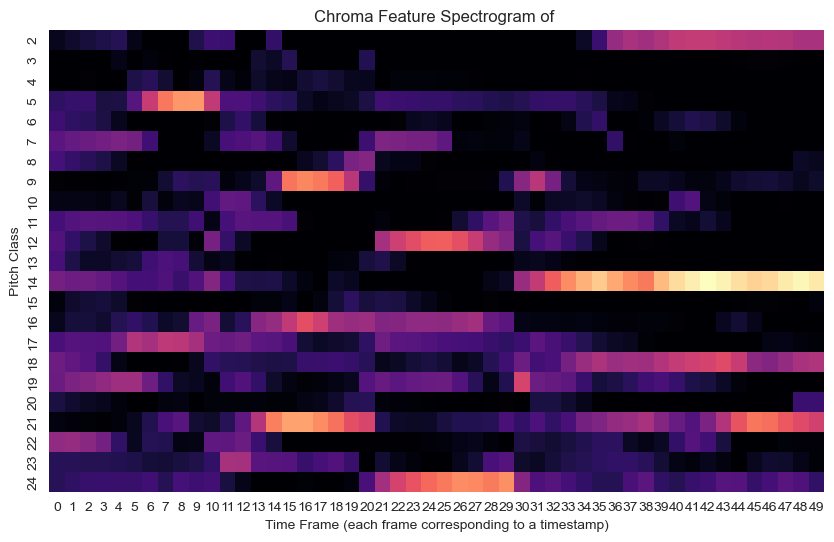

['0003', '0004', '0006', '0010', '0012', '0015', '0016', '0018', '0019', '0021', '0022', '0023', '0025', '0026', '0027', '0029', '0030', '0033', '0034', '0035', '0037', '0039', '0040', '0041', '0043', '0044', '0046', '0049', '0050', '0051', '0053', '0054', '0055', '0056', '0059', '0061', '0062', '0064', '0066', '0067', '0068', '0070', '0071', '0072', '0073', '0074', '0075', '0077', '0078', '0079', '0081', '0083', '0085', '0086', '0088', '0089', '0091', '0092', '0094', '0095', '0097', '0099', '0100', '0101', '0102', '0104', '0105', '0106', '0107', '0109', '0111', '0112', '0114', '0115', '0116', '0119', '0120', '0122', '0123', '0124', '0126', '0127', '0128', '0130', '0131', '0133', '0134', '0139', '0140', '0141', '0145', '0147', '0148', '0149', '0150', '0153', '0154', '0155', '0157', '0158', '0159', '0160', '0162', '0167', '0168', '0169', '0170', '0172', '0176', '0177', '0179', '0180', '0181', '0182', '0183', '0184', '0185', '0187', '0188', '0190', '0191', '0192', '0193', '0194', '0195',

In [19]:
# Path to the base directory containing numbered folders
csv_base_dir = os.path.join('training_data', 'metadata', 'metadata')
lab_base_dir = os.path.join('training_data', 'annotations', 'annotations')

# Load and concatenate all chroma CSV files
big_dataframe = load_and_concatenate_chroma_files(csv_base_dir, lab_base_dir)

# drop file name column
big_dataframe.drop(big_dataframe.columns[[0]], axis=1, inplace=True)

# drop extra features
big_dataframe.drop(big_dataframe.columns[13:25], axis=1, inplace=True)

# list of all of the index datafile folder name
data_file_names = get_list_of_data_file_name(csv_base_dir)

In [76]:
big_dataframe.head(50)

,1,2,3,4,5,6,7,8,9,10,11,12,13,Y
0,0.000000,0.198482,0.000000,0.000000,0.635556,0.741292,1.004300,0.814440,0.029282,0.141189,0.807930,0.910150,0.823603,N
1,0.046440,0.310882,0.000000,0.000000,0.693876,0.628553,1.080040,0.676368,0.017598,0.140079,0.927873,0.663851,0.460197,N
2,0.092880,0.404969,0.000000,0.037238,0.682770,0.591140,1.146830,0.575229,0.014624,0.128743,0.968012,0.461634,0.260265,N
3,0.139320,0.480218,0.000000,0.005002,0.435639,0.450297,1.211120,0.458671,0.006372,0.102629,0.962884,0.301896,0.257244,N
4,0.185760,0.539064,0.146614,0.010891,0.444361,0.196939,1.298150,0.239054,0.023305,0.208090,0.948395,0.025802,0.341731,N
5,0.232200,0.165807,0.000000,0.455848,0.965423,0.000000,1.232440,0.000000,0.054830,0.034234,0.866962,0.000000,0.384071,N
6,0.278639,0.000000,0.094263,0.576515,1.961290,0.000000,0.766963,0.000000,0.046361,0.397669,0.682960,0.000000,0.770187,N
7,0.325079,0.001740,0.021126,0.335464,2.595800,0.000000,0.000000,0.000000,0.340361,0.089094,0.528319,0.383412,0.871471,N
8,0.371519,0.000000,0.000000,0.000000,2.822160,0.000000,0.000000,0.000000,0.601873,0.221148,0.532542,0.387659,0.834525,N
9,0.417959,0.494383,0.016506,0.102202,2.837510,0.000000,0.000000,0.000000,0.526568,0.182221,0.774787,0.068274,0.367045,N


Data Analysis

In [6]:
def plot_spectrogram(df, pitch_class):
    # Exclude the last column ('Y') which contains the chord labels
    chroma_data = df.iloc[:, 1:-1]  # Exclude the last column with chord labels

    # Normalize the chroma data between 0 and 1
    # chroma_data_normalized = chroma_data / chroma_data.max().max()

    # Create a figure and plot
    plt.figure(figsize=(10, 6))

    # Create a heatmap of the normalized chroma features over time
    sns.heatmap(chroma_data.T, cmap="magma", cbar=False)

    # Add labels and title
    plt.title(f'Chroma Feature Spectrogram of {pitch_class}')
    plt.xlabel('Time Frame (each frame corresponding to a timestamp)')
    plt.ylabel('Pitch Class')

    # Show the plot
    plt.show()

In [ ]:
for group_name, grouped_df in big_dataframe.groupby('Y'):
    print(group_name)
    plot_spectrogram(grouped_df.iloc[:50, :], group_name)


In [ ]:
plot_spectrogram(big_dataframe.iloc[:500, :], "")

In [37]:
example_df = import_dataframe_from_files(csv_base_dir, lab_base_dir, data_file_names[0])
example_df.head(50)

Opening file: csv training_data/metadata/metadata/0003/bothchroma.csv, lab:training_data/annotations/annotations/0003/majmin.lab
Loading training_data/metadata/metadata/0003/bothchroma.csv


,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,Y
0,0.000000,0.198482,0.000000,0.000000,0.635556,0.741292,1.004300,0.814440,0.029282,0.141189,...,0.860228,1.165150,1.135610,0.428420,0.112475,1.492970,0.556156,0.562561,0.864485,N
1,0.046440,0.310882,0.000000,0.000000,0.693876,0.628553,1.080040,0.676368,0.017598,0.140079,...,0.939165,1.053370,1.308230,0.322710,0.067595,1.538040,0.566076,0.627636,0.904673,N
2,0.092880,0.404969,0.000000,0.037238,0.682770,0.591140,1.146830,0.575229,0.014624,0.128743,...,0.924133,0.946938,1.369670,0.234190,0.056174,1.429350,0.532472,0.686886,0.906338,N
3,0.139320,0.480218,0.000000,0.005002,0.435639,0.450297,1.211120,0.458671,0.006372,0.102629,...,0.917475,0.679013,1.485320,0.186736,0.024474,1.227170,0.529464,0.717978,1.057680,N
4,0.185760,0.539064,0.146614,0.010891,0.444361,0.196939,1.298150,0.239054,0.023305,0.208090,...,1.209160,0.135402,1.612020,0.097325,0.089518,0.648249,0.520988,0.703834,1.287430,N
5,0.232200,0.165807,0.000000,0.455848,0.965423,0.000000,1.232440,0.000000,0.054830,0.034234,...,1.762650,0.000000,1.604880,0.000000,0.210607,0.214704,0.476254,0.705456,1.148950,N
6,0.278639,0.000000,0.094263,0.576515,1.961290,0.000000,0.766963,0.000000,0.046361,0.397669,...,1.668580,0.000000,1.181550,0.000118,0.506162,0.539949,0.375175,0.776257,1.056500,N
7,0.325079,0.001740,0.021126,0.335464,2.595800,0.000000,0.000000,0.000000,0.340361,0.089094,...,1.883340,0.000000,0.648898,0.105026,0.861630,0.520769,0.355900,0.551588,0.954048,N
8,0.371519,0.000000,0.000000,0.000000,2.822160,0.000000,0.000000,0.000000,0.601873,0.221148,...,1.853680,0.015794,0.246541,0.123962,0.986773,0.116510,0.420120,0.814196,0.637167,N
9,0.417959,0.494383,0.016506,0.102202,2.837510,0.000000,0.000000,0.000000,0.526568,0.182221,...,1.666540,0.206045,0.220245,0.003181,0.346538,0.128040,0.491614,0.745983,0.264323,N


Save data into new csv files for ease of access

In [41]:
# path to the exported data
processed_data_folder_path = os.path.join("processed_data")
os.makedirs(os.path.dirname(processed_data_folder_path), exist_ok=True)

for name in data_file_names:
    df = import_dataframe_from_files(csv_base_dir, lab_base_dir, name)
    print(os.path.join(processed_data_folder_path, name + '.csv'))
    df.to_csv(os.path.join(processed_data_folder_path, name + '.csv'), index=False)

Opening file: csv training_data/metadata/metadata/0003/bothchroma.csv, lab:training_data/annotations/annotations/0003/majmin.lab
Loading training_data/metadata/metadata/0003/bothchroma.csv
processed_data/0003.csv
